### Modeling Suicide Rates in Mexico
#### Final Project
Team: Victor González | Felipe Murillo | Marcela A. Vasquez

TEC Data Bootcamp | 2020

This Jupyter notebok performs the following tasks:
1. Import modeling data
1. Convert category data into numerical
1. Use StandardScaler to scale data
1. Splits data into training and test sets
1. Tries various regression models to best fit data
1. Run Random Search CV to coarse tune model with best result
1. Run Grid Search CV to fine tune model
1. Create in input matrix to predict suicide rates in 2016 - 2018
1. Run model and get predicts
1. Graph results

---

### Import dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

### Import data 

In [3]:
# Read the csv file into a pandas DataFrame
mxData = pd.read_csv('../Data/Mexico Research Data/mexModel.csv', index_col=0)
mxData.tail()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity,alcohol,migration
293,2015,female,35-54 years,303,15940497,1.90,"1,169,622,672,463",10228,Generation X,4.472813,1.0,65.5,4.24,-0.478
294,2015,female,55-74 years,88,7021916,1.25,"1,169,622,672,463",10228,Boomers,4.472813,1.0,65.5,4.24,-0.478
295,2015,male,5-14 years,137,11790898,1.16,"1,169,622,672,463",10228,Generation Z,0.000000,0.0,16.3,4.24,-0.478
296,2015,female,5-14 years,95,11261292,0.84,"1,169,622,672,463",10228,Generation Z,0.000000,0.0,12.5,4.24,-0.478
297,2015,female,75+ years,11,1915217,0.57,"1,169,622,672,463",10228,Silent,4.472813,1.0,65.5,4.24,-0.478


In [4]:
# List unique age groups
mxData.loc[mxData.year == 2015]

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity,alcohol,migration
286,2015,male,25-34 years,1195,10243158,11.67,"1,169,622,672,463",10228,Millenials,4.250906,1.0,63.0,4.24,-0.478
287,2015,male,15-24 years,1347,11676480,11.54,"1,169,622,672,463",10228,Millenials,4.250906,1.0,63.0,4.24,-0.478
288,2015,male,75+ years,163,1427654,11.42,"1,169,622,672,463",10228,Silent,4.250906,1.0,63.0,4.24,-0.478
289,2015,male,35-54 years,1560,15181008,10.28,"1,169,622,672,463",10228,Generation X,4.250906,1.0,63.0,4.24,-0.478
290,2015,male,55-74 years,584,6465941,9.03,"1,169,622,672,463",10228,Boomers,4.250906,1.0,63.0,4.24,-0.478
291,2015,female,15-24 years,484,11354811,4.26,"1,169,622,672,463",10228,Millenials,4.472813,1.0,65.5,4.24,-0.478
292,2015,female,25-34 years,267,10079012,2.65,"1,169,622,672,463",10228,Millenials,4.472813,1.0,65.5,4.24,-0.478
293,2015,female,35-54 years,303,15940497,1.90,"1,169,622,672,463",10228,Generation X,4.472813,1.0,65.5,4.24,-0.478
294,2015,female,55-74 years,88,7021916,1.25,"1,169,622,672,463",10228,Boomers,4.472813,1.0,65.5,4.24,-0.478
295,2015,male,5-14 years,137,11790898,1.16,"1,169,622,672,463",10228,Generation Z,0.000000,0.0,16.3,4.24,-0.478


### Extract X and y values from data set to build model

In [5]:
#X = mxData[["year", "sex", "age","population","gdp_per_capita ($)"]]
X = mxData[["year", "sex", "age","population","gdp_per_capita ($)","unemployment","divorce","obesity","alcohol","migration"]]
y = mxData["suicides/100k pop"].values.reshape(-1, 1)
print(X.shape, y.shape)

(298, 10) (298, 1)


### Convert categories to numerical values and split data into train/test data

In [6]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to numericval
X = pd.get_dummies(X)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,year,population,gdp_per_capita ($),unemployment,divorce,obesity,alcohol,migration,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
224,2009,11560068,8651,0.000000,0.00,10.7,4.37,-1.022,1,0,0,0,0,1,0,0
78,1997,3962305,5864,3.735000,0.43,56.7,4.76,-4.820,1,0,0,0,0,0,1,0
66,1996,3868948,4904,5.525000,0.42,56.1,5.26,-4.820,1,0,0,0,0,0,1,0
295,2015,11790898,10228,0.000000,0.00,16.3,4.24,-0.478,0,1,0,0,0,1,0,0
280,2014,9978692,11663,4.874411,0.90,65.1,3.94,-0.716,1,0,0,1,0,0,0,0


In [7]:
# List all X columns
X.columns

Index(['year', 'population', 'gdp_per_capita ($)', 'unemployment', 'divorce',
       'obesity', 'alcohol', 'migration', 'sex_female', 'sex_male',
       'age_15-24 years', 'age_25-34 years', 'age_35-54 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years'],
      dtype='object')

### Scale data

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale data using StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# Scale train/test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### 1st Model: Linear Regression

In [10]:
# Specify model and fit
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start_time = time.time()
model.fit(X_train_scaled, y_train_scaled)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.1072080135345459 seconds ---


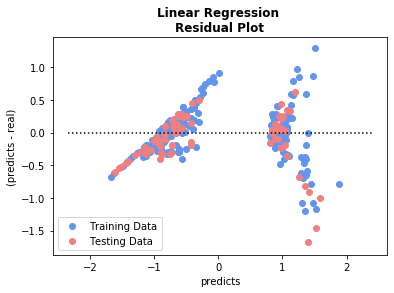

In [11]:
# Plot regression residuals
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="cornflowerblue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightcoral", label="Testing Data")
plt.legend(loc="lower left")
plt.hlines(y=0, xmin=X_test_scaled.min(), xmax=X_test_scaled.max(), linestyle =":")
plt.title("Linear Regression \nResidual Plot",weight="bold")
plt.xlabel("predicts")
plt.ylabel("(predicts - real)")
plt.show()

In [12]:
# Make model predictions and score
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17268023204621258, R2: 0.849941400264395


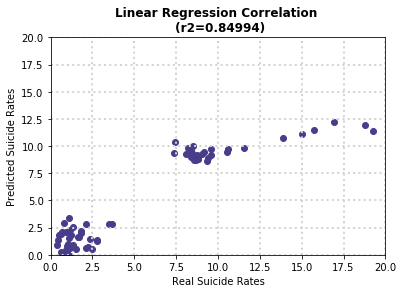

In [13]:
# Plot predicted values vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = "darkslateblue")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Linear Regression Correlation \n (r2={round(model.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

### 2nd Model: Polynomial Features + Ridge Regression

--- 0.01793503761291504 seconds ---


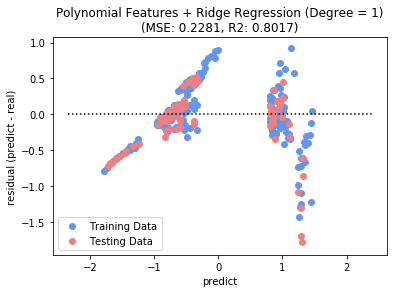

--- 0.02285909652709961 seconds ---


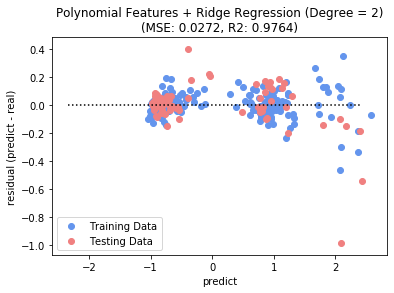

--- 0.009015083312988281 seconds ---


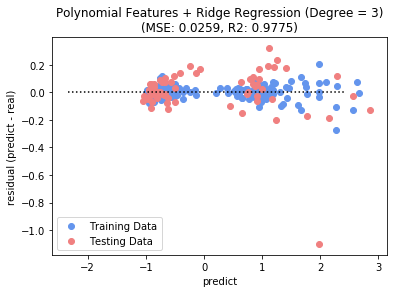

--- 0.032379150390625 seconds ---


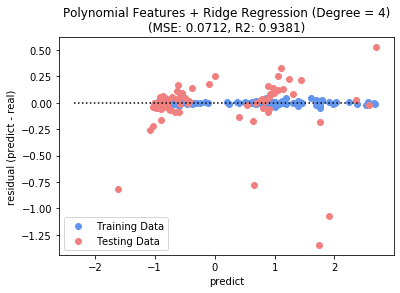

--- 0.14962410926818848 seconds ---


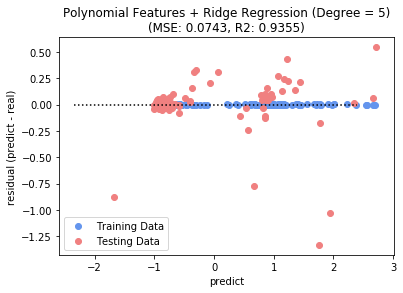

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Try polynomials with degree n = [1,2,3,4,5]
for count, degree in enumerate([1,2, 3, 4, 5]):
    # Create a model pipeline
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    # Fit data to model
    start_time = time.time()
    model.fit(X_train_scaled, y_train_scaled)
    print("--- %s seconds ---" % (time.time() - start_time))
    # Make predictions
    predictions = model.predict(X_test_scaled)
    # Score model
    MSE = mean_squared_error(y_test_scaled, predictions)
    r2 = model.score(X_test_scaled, y_test_scaled)
    # Plot residuals
    plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="cornflowerblue", label="Training Data")
    plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightcoral", label="Testing Data")
    plt.legend(loc='lower left')
    plt.hlines(y=0, xmin=X_test_scaled.min(), xmax=X_test_scaled.max(), linestyle =":")
    plt.title(f"Polynomial Features + Ridge Regression (Degree = {degree})\n(MSE: {round(MSE,4)}, R2: {round(r2,4)})")
    plt.ylabel("residual (predict - real)")
    plt.xlabel("predict")
    plt.show()

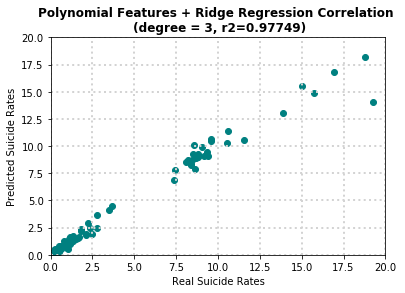

In [15]:
# Create the best polynomial model (n =3), fit, and predict
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

# Plot predict vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = "teal")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Polynomial Features + Ridge Regression Correlation \n (degree = 3, r2={round(model.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

### 3rd Model: Random Forests Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

degrees = []
mse_train = []
mse_test = []
maxTestR = 0

# Create random forest models cycying thru various N-estimator values 
for estimator in np.arange(1,400,10):
    degrees.append(estimator)
    # Create, fit and Predict
    regressor = RandomForestRegressor(n_estimators=estimator, random_state=0)
    regressor.fit(X_train_scaled, np.ravel(y_train_scaled))
    predictions_test = regressor.predict(X_test_scaled)
    # Score model
    MSE_test = mean_squared_error(y_test_scaled, predictions_test)
    r2=regressor.score(X_test_scaled, y_test_scaled)
    # Determine which n_estimator yields the highest r2 score
    if r2 > maxTestR:
        maxTestR = r2
        maxDeg = estimator
    #
    predictions_train = regressor.predict(X_train_scaled)
    MSE_train = mean_squared_error(y_train_scaled, predictions_train)
    #
    mse_train.append(MSE_train)
    mse_test.append(MSE_test)

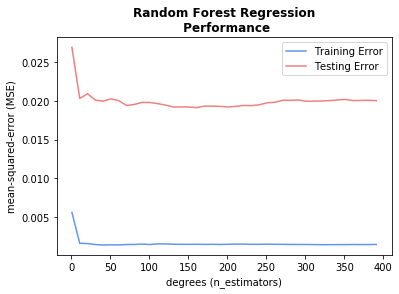

In [17]:
# Plot residuals
plt.plot(degrees,mse_train, c="cornflowerblue", label="Training Error")
plt.plot(degrees,mse_test, c="lightcoral", label="Testing Error")
plt.legend(loc='upper right')
plt.xlabel("degrees (n_estimators)")
plt.ylabel("mean-squared-error (MSE)")
plt.title(f"Random Forest Regression\n Performance", weight='bold')
plt.show()

--- 0.2661709785461426 seconds ---


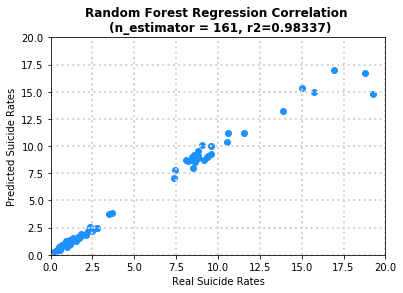

In [18]:
# Create model using optimized n_estimator
n_est = maxDeg
regressor = RandomForestRegressor(n_estimators=n_est, random_state=0)
start_time = time.time()
regressor.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))
predictions = regressor.predict(X_test_scaled)

# Plot predicted vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = "dodgerblue")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Random Forest Regression Correlation \n (n_estimator = {n_est}, r2={round(regressor.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

Text(0.5, 1.0, 'Feature Importance (Suicide Rates)')

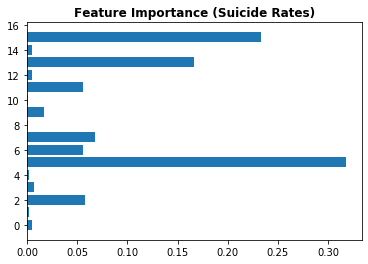

In [19]:
# Determine which feature is the most important
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(sorted_idx, feature_importance, align='center')
plt.title('Feature Importance (Suicide Rates)',weight="bold")

### 4th Model: Gradient Tree Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

degrees = []
mse_train = []
mse_test = []
maxTestR = 0

# Determine which N-estimator provides the highest scored Gradient Boost Regression
for estimator in np.arange(1,200):
    degrees.append(estimator)
    # Create model, fit and predict
    reg = GradientBoostingRegressor(n_estimators=estimator ,random_state=0)
    reg.fit(X_train_scaled, np.ravel(y_train_scaled))
    predictions_test = reg.predict(X_test_scaled)
    # Score model
    MSE_test = mean_squared_error(y_test_scaled, predictions_test)
    r2=reg.score(X_test_scaled, y_test_scaled)
    # Determine n_estimator yielding highest scoring model
    if r2 > maxTestR:
        maxTestR = r2
        maxDeg = estimator
    #
    predictions_train = reg.predict(X_train_scaled)
    MSE_train = mean_squared_error(y_train_scaled, predictions_train)
    #
    mse_train.append(MSE_train)
    mse_test.append(MSE_test)

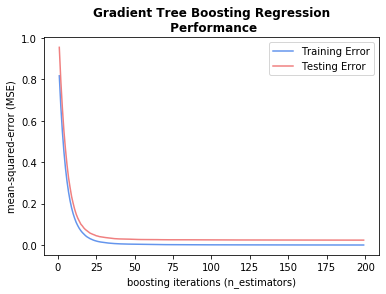

In [21]:
# Plot residuals
plt.plot(degrees,mse_train, c="cornflowerblue", label="Training Error")
plt.plot(degrees,mse_test, c="lightcoral", label="Testing Error")
plt.legend(loc='upper right')
plt.xlabel("boosting iterations (n_estimators)")
plt.ylabel("mean-squared-error (MSE)")
plt.title(f"Gradient Tree Boosting Regression\n Performance", weight='bold')
plt.show()

--- 0.11107206344604492 seconds ---


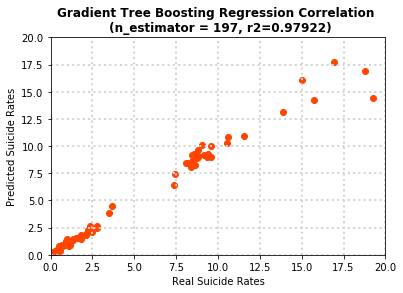

In [22]:
# Create highest performing model
n_est = maxDeg
reg = GradientBoostingRegressor(n_estimators=n_est, random_state=0)
start_time = time.time()
reg.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))
predictions = reg.predict(X_test_scaled)

# Plot predicts vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = "orangered")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Gradient Tree Boosting Regression Correlation \n (n_estimator = {n_est}, r2={round(reg.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

### 5th Model: Support Vector Machines

In [24]:
from sklearn.svm import SVR

# Radial Basis Function (RBF)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Linear
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

# Polynomial
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
#
model_color = ['orchid', 'lightseagreen', 'crimson']

--- 0.013230085372924805 seconds ---


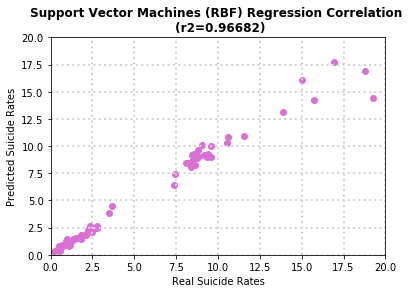

In [25]:
# SVR RBF: Fit, predict, score
start_time = time.time()
svr_rbf.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))
svr_predictions = svr_rbf.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test_scaled, svr_predictions)
r2=svr_rbf.score(X_test_scaled, y_test_scaled)

# Plot predicted vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = model_color[0])
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Support Vector Machines (RBF) Regression Correlation \n (r2={round(r2,5)})",weight="bold")
plt.show()

--- 0.7865190505981445 seconds ---


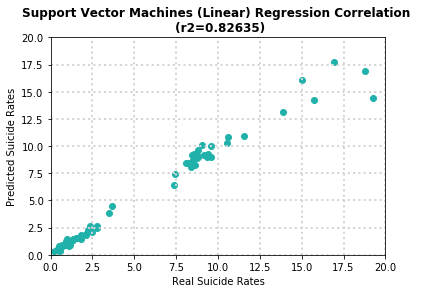

In [26]:
# SVR Linear: Fit, predict, score
start_time = time.time()
svr_lin.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))
svr_predictions = svr_lin.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test_scaled, svr_predictions)
r2=svr_lin.score(X_test_scaled, y_test_scaled)

# Plot predicted vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = model_color[1])
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Support Vector Machines (Linear) Regression Correlation \n (r2={round(r2,5)})",weight="bold")
plt.show()

--- 0.031028270721435547 seconds ---


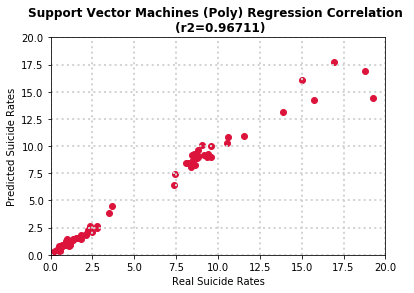

In [27]:
# SVR Polynomial: Fit, predict, score
start_time = time.time()
svr_poly.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))
svr_predictions = svr_poly.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test_scaled, svr_predictions)
r2=svr_poly.score(X_test_scaled, y_test_scaled)

# Plot predicted vs real values
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = model_color[2])
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Support Vector Machines (Poly) Regression Correlation \n (r2={round(r2,5)})",weight="bold")
plt.show()

### Now that we know Random Forest provides the best results... let's fine tune the model...

In [28]:
from sklearn.model_selection import RandomizedSearchCV

### List of hyperparameters:
##### n_estimators = number of trees in the foreset
##### max_features = max number of features considered for splitting a node
#### max_depth = max number of levels in each decision tree
#### min_samples_split = min number of data points placed in a node before the node is split
#### min_samples_leaf = min number of data points allowed in a leaf node
#### bootstrap = method for sampling data points (with or without replacement)

In [29]:
# Number of trees in random forest (def = 100)
n_estimators = [int(x) for x in np.arange(10,210,5)]
# Number of features to consider at every split (def = auto)
max_features = ['auto', 'sqrt','none']
# Maximum number of levels in tree (def = None)
max_depth = [int(x) for x in np.arange(10,110,10)]
max_depth.append(None)
# Minimum number of samples required to split a node (def = 2)
min_samples_split = np.arange(1,50,5)
# Minimum number of samples required at each leaf node (def = 1)
min_samples_leaf = [1, 2, 4, 8, 16]
# Method of selecting samples for training each tree (def = True)
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205], 'max_features': ['auto', 'sqrt', 'none'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]), 'min_samples_leaf': [1, 2, 4, 8, 16], 'bootstrap': [True, False]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_opt = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid, 
    n_iter = 200, 
    cv = None, 
    verbose=2, 
    random_state=0, 
    n_jobs = -1
)
# Fit the random search model
start_time = time.time()
rf_opt.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 993 out of 1000 | elapsed:   52.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   52.3s finished


--- 52.521138191223145 seconds ---


In [31]:
# List best parameters to use
rf_opt.best_params_

{'n_estimators': 155,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [32]:
# Display the highest score
rf_opt.best_score_

0.9844647353968122

In [33]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [6, 8, 10, 12, 14],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [4, 5, 6, 7, 8],
    'n_estimators': [150, 155, 160, 165]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = None, n_jobs = -1, verbose = 2)

In [34]:
# List the best params to use
start_time = time.time()
grid_search.fit(X_train_scaled, np.ravel(y_train_scaled))
print("--- %s seconds ---" % (time.time() - start_time))
grid_search.best_params_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  5.2min finished


--- 313.5979359149933 seconds ---


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 165}

In [33]:
# Display highest score
grid_search.best_score_

0.9873035517581565

### Start Predicting!

In [34]:
# Create dataframe with 2010 - 2015
male = mxData.loc[(mxData.year >2009) & (mxData.sex == "male")]
female = mxData.loc[(mxData.year >2009) & (mxData.sex == "female")]

In [35]:
female_pivot = female.pivot(index="age",columns="year",values="suicides/100k pop")
female_pivot = female_pivot.reindex(["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"])
male_pivot = male.pivot(index="age",columns="year",values="suicides/100k pop")
male_pivot = male_pivot.reindex(["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"])

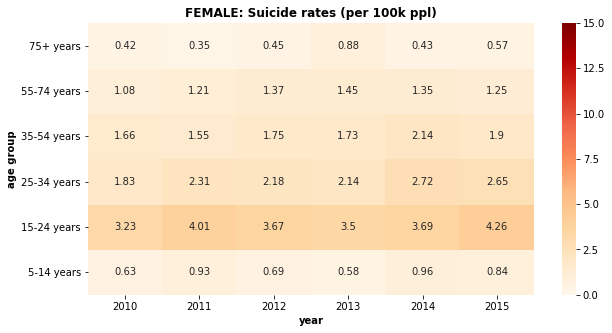

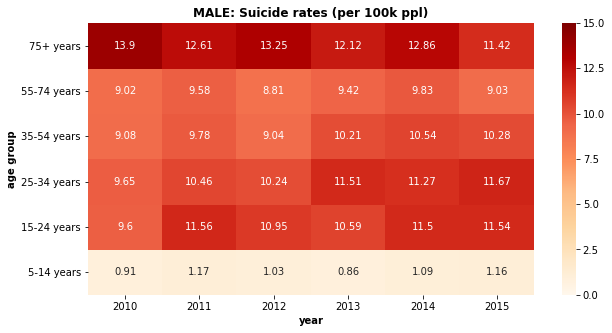

In [36]:
import seaborn as sns
# Create two heatmaps colored by suicide rate
annot_kws = {"va": 'center'}

plt.figure(figsize=(10,5))
sns.heatmap(female_pivot, fmt="g", annot=True, cmap='OrRd', annot_kws=annot_kws, vmin=0, vmax=15)
plt.title("FEMALE: Suicide rates (per 100k ppl)", weight="bold")
plt.xlabel("year", weight="bold")
plt.ylabel("age group",weight="bold")
plt.ylim(0,6)

plt.figure(figsize=(10,5))
sns.heatmap(male_pivot, fmt="g", annot=True, cmap='OrRd', annot_kws=annot_kws, vmin=0, vmax=15)
plt.title("MALE: Suicide rates (per 100k ppl)", weight="bold")
plt.xlabel("year", weight="bold")
plt.ylabel("age group",weight="bold")
plt.ylim(0,6)
plt.show()

In [39]:
# Get populations for 2016 -2018
mxPop = "../Data/Mexico Research Data/pob_ini_proyecciones.csv"
population = pd.read_csv(mxPop, encoding = "ISO-8859-1")

# Filter out undesired years
population = population.loc[(population["AÑO"] > 2015) & (population["AÑO"] < 2019)]

# Drop unwanted columns
population = population.drop(columns=["CVE_GEO","RENGLON"])


# Create a function that designates age group
def designate_ageGrp(age):
    if age >= 75:
        grp = "75+ years"
    elif (age >=55) & (age < 75):
        grp = "55-74 years"
    elif (age >=35) & (age < 55):
        grp = "35-54 years"
    elif (age >=25) & (age < 35):
        grp = "25-34 years"
    elif (age >=15) & (age < 25):
        grp = "15-24 years"
    elif (age >=5) & (age < 15):
        grp = "5-14 years"
    else:
        grp = "0-4 years"
    return(grp)

# Create an age group list
ageGrp = []
for pop in population.index:
    ageGrp.append(designate_ageGrp(population.loc[pop]["EDAD"]))
    
# Append age group to population dataframe
population["age"] = ageGrp

# Reorder columns
population = population[["ENTIDAD","AÑO","age", "SEXO","POBLACION"]]

# Rename columns
population = population.rename(columns={"ENTIDAD": "State","AÑO":"year","SEXO":"sex","POBLACION": "population"})
mxPop = population.groupby(by=["State","year","age","sex"]).sum()
mxPop = mxPop.reset_index()
mxPop.loc[mxPop.State == "Michoacán","State"] = 'Michoacán de Ocampo'
mxPop.loc[mxPop.State == "Coahuila","State"] = 'Coahuila de Zaragoza'
mxPop.loc[mxPop.State == "Veracruz","State"] = 'Veracruz de Ignacio de la Llave'
mxPop.loc[mxPop.sex == "Hombres","sex"] = 'male'
mxPop.loc[mxPop.sex == "Mujeres","sex"] = 'female'

In [40]:
# Filter national values
X_trial = mxPop.loc[(mxPop.State == "República Mexicana") & (mxPop.year > 2014) & (mxPop.age != "0-4 years")]
X_trial = X_trial.drop(columns="State").reset_index(drop=True)
X_trial


,year,age,sex,population
0,2016,15-24 years,male,11073872
1,2016,15-24 years,female,10873851
2,2016,25-34 years,male,9390393
3,2016,25-34 years,female,9988722
4,2016,35-54 years,male,14230187
5,2016,35-54 years,female,15703281
6,2016,5-14 years,male,11370358
7,2016,5-14 years,female,10982029
8,2016,55-74 years,male,6627000
9,2016,55-74 years,female,7430334


In [41]:
# Initialize lists
alcohol = []
migration = []
divorce = []
unemployment = []
obesity = []
gdp_per_cap = []

In [42]:
# Unemployment, obesity, migration, alcohol -> real data
# Divorce -> 2016 and constant
# POpulation -> INEGI (real data)
# GDP per capita - World Bank (real data)

# Populate indicator lists
for i in X_trial.index:
    row = X_trial.loc[i]
    # Keep alcohol and migration rates constant
    alcohol.append(4.25)
    migration.append(-0.478)
    # MALE PREDICTS
    if row["sex"] == "male":
        if row["year"] == 2016:
            unemployment.append(3.849)
            gdp_per_cap.append(8739.76)
            if row["age"] == "5-14 years":
                obesity.append(16.7)
                divorce.append(0.0)
            else:
                obesity.append(63.6)
                divorce.append(1.10)
        elif row["year"] == 2017:
            unemployment.append(3.323)
            gdp_per_cap.append(9278.42)
            if row["age"] == "5-14 years":
                obesity.append(17.1)
                divorce.append(0.0)
            else:
                obesity.append(64.2)
                divorce.append(1.10)
        elif row["year"] == 2018:
            unemployment.append(3.211)            
            gdp_per_cap.append(9673.44)
            if row["age"] == "5-14 years":
                obesity.append(17.5)
                divorce.append(0.0)
            else:
                obesity.append(64.8)
                divorce.append(1.10)
    # FEMALE PREDICTS
    if row["sex"] == "female":
        if row["year"] == 2016:
            unemployment.append(3.943)
            gdp_per_cap.append(8739.76)
            if row["age"] == "5-14 years":
                obesity.append(12.8)
                divorce.append(0.0)
            else:
                obesity.append(66.0)
                divorce.append(1.10)
        elif row["year"] == 2017:
            unemployment.append(3.623)
            gdp_per_cap.append(9278.42)
            if row["age"] == "5-14 years":
                obesity.append(13.1)
                divorce.append(0.0)
            else:
                obesity.append(66.5)
                divorce.append(1.10)
        elif row["year"] == 2018:
            unemployment.append(3.443)
            gdp_per_cap.append(9673.44)
            if row["age"] == "5-14 years":
                obesity.append(13.4)
                divorce.append(0.0)
            else:
                obesity.append(67)
                divorce.append(1.10)

In [43]:
# Add lists to dataframe
X_trial["gdp_per_capita ($)"] = gdp_per_cap
X_trial["unemployment"] = unemployment
X_trial["divorce"] = divorce
X_trial["obesity"] = obesity
X_trial["alcohol"] = alcohol
X_trial["migration"] = migration
final = X_trial
final

,year,age,sex,population,gdp_per_capita ($),unemployment,divorce,obesity,alcohol,migration
0,2016,15-24 years,male,11073872,8739.76,3.849,1.1,63.6,4.25,-0.478
1,2016,15-24 years,female,10873851,8739.76,3.943,1.1,66.0,4.25,-0.478
2,2016,25-34 years,male,9390393,8739.76,3.849,1.1,63.6,4.25,-0.478
3,2016,25-34 years,female,9988722,8739.76,3.943,1.1,66.0,4.25,-0.478
4,2016,35-54 years,male,14230187,8739.76,3.849,1.1,63.6,4.25,-0.478
5,2016,35-54 years,female,15703281,8739.76,3.943,1.1,66.0,4.25,-0.478
6,2016,5-14 years,male,11370358,8739.76,3.849,0.0,16.7,4.25,-0.478
7,2016,5-14 years,female,10982029,8739.76,3.943,0.0,12.8,4.25,-0.478
8,2016,55-74 years,male,6627000,8739.76,3.849,1.1,63.6,4.25,-0.478
9,2016,55-74 years,female,7430334,8739.76,3.943,1.1,66.0,4.25,-0.478


In [44]:
# Get dummies for X_trial
X_trial = pd.get_dummies(X_trial)
# Make sure they're in the same order as model
X_trial= X_trial[['year', 'population', 'gdp_per_capita ($)', 'unemployment', 'divorce','obesity', 'alcohol', 'migration', 'sex_female', 'sex_male','age_15-24 years', 'age_25-34 years','age_35-54 years', 'age_5-14 years', 'age_55-74 years', 'age_75+ years']]
# Scale X_trial
X_trial_scaled = X_scaler.transform(X_trial)

In [45]:
# Apply model
mxPredicts_o = grid_search.best_estimator_.predict(X_trial_scaled)
mxPredicts = y_scaler.inverse_transform(mxPredicts_o)

In [46]:
# Add predicts to dataframe
final = pd.DataFrame(X_trial)
final["PREDICTS"] = mxPredicts.round(2)
final

,year,population,gdp_per_capita ($),unemployment,divorce,obesity,alcohol,migration,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,PREDICTS
0,2016,11073872,8739.76,3.849,1.1,63.6,4.25,-0.478,0,1,1,0,0,0,0,0,11.05
1,2016,10873851,8739.76,3.943,1.1,66.0,4.25,-0.478,1,0,1,0,0,0,0,0,3.61
2,2016,9390393,8739.76,3.849,1.1,63.6,4.25,-0.478,0,1,0,1,0,0,0,0,10.91
3,2016,9988722,8739.76,3.943,1.1,66.0,4.25,-0.478,1,0,0,1,0,0,0,0,2.43
4,2016,14230187,8739.76,3.849,1.1,63.6,4.25,-0.478,0,1,0,0,1,0,0,0,10.30
5,2016,15703281,8739.76,3.943,1.1,66.0,4.25,-0.478,1,0,0,0,1,0,0,0,1.81
6,2016,11370358,8739.76,3.849,0.0,16.7,4.25,-0.478,0,1,0,0,0,1,0,0,2.57
7,2016,10982029,8739.76,3.943,0.0,12.8,4.25,-0.478,1,0,0,0,0,1,0,0,0.89
8,2016,6627000,8739.76,3.849,1.1,63.6,4.25,-0.478,0,1,0,0,0,0,1,0,9.52
9,2016,7430334,8739.76,3.943,1.1,66.0,4.25,-0.478,1,0,0,0,0,0,1,0,1.31


In [47]:
# Undummify the X_trial columns
# Source: https://stackoverflow.com/questions/50607740/reverse-a-get-dummies-encoding-in-pandas
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [48]:
final_f = undummify(final)
final_f

,year,population,gdp,unemployment,divorce,obesity,alcohol,migration,sex,age,PREDICTS
0,2016,11073872,per_capita ($),3.849,1.1,63.6,4.25,-0.478,male,15-24 years,11.05
1,2016,10873851,per_capita ($),3.943,1.1,66.0,4.25,-0.478,female,15-24 years,3.61
2,2016,9390393,per_capita ($),3.849,1.1,63.6,4.25,-0.478,male,25-34 years,10.91
3,2016,9988722,per_capita ($),3.943,1.1,66.0,4.25,-0.478,female,25-34 years,2.43
4,2016,14230187,per_capita ($),3.849,1.1,63.6,4.25,-0.478,male,35-54 years,10.30
5,2016,15703281,per_capita ($),3.943,1.1,66.0,4.25,-0.478,female,35-54 years,1.81
6,2016,11370358,per_capita ($),3.849,0.0,16.7,4.25,-0.478,male,5-14 years,2.57
7,2016,10982029,per_capita ($),3.943,0.0,12.8,4.25,-0.478,female,5-14 years,0.89
8,2016,6627000,per_capita ($),3.849,1.1,63.6,4.25,-0.478,male,55-74 years,9.52
9,2016,7430334,per_capita ($),3.943,1.1,66.0,4.25,-0.478,female,55-74 years,1.31


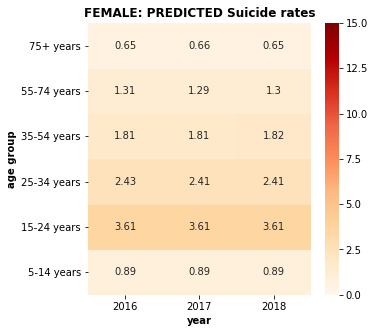

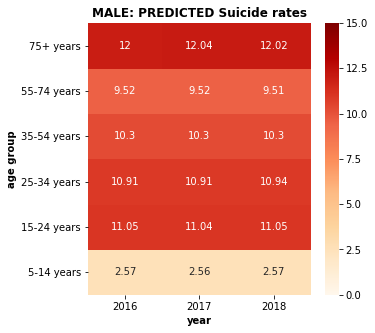

In [49]:
# Create 2016-2018 pivot table
female_pivot = final_f.loc[final_f.sex=="female"].pivot(index="age",columns="year",values="PREDICTS")
female_pivot = female_pivot.reindex(["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"])
male_pivot = final_f.loc[final_f.sex=="male"].pivot(index="age",columns="year",values="PREDICTS")
male_pivot = male_pivot.reindex(["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"])

# Plot predicts
plt.figure(figsize=(5,5))
sns.heatmap(female_pivot, fmt="g", annot=True, cmap='OrRd', annot_kws=annot_kws, vmin=0, vmax=15)
plt.title("FEMALE: PREDICTED Suicide rates", weight="bold")
plt.xlabel("year", weight="bold")
plt.ylabel("age group",weight="bold")
plt.ylim(0,6)

plt.figure(figsize=(5,5))
sns.heatmap(male_pivot, fmt="g", annot=True, cmap='OrRd', annot_kws=annot_kws, vmin=0, vmax=15)
plt.title("MALE: PREDICTED Suicide rates", weight="bold")
plt.xlabel("year", weight="bold")
plt.ylabel("age group",weight="bold")
plt.ylim(0,6)
plt.show()